## Part 2. Classification and logistic regression

<br>
이제 분류 문제를 다뤄보자. 분류는 $y$ 값이 이산형 값이라는 것만 제외하면 회귀 문제와 같다.

일단은 $y$가 0과 1의 값을 갖는 **이진 분류(binary classification)** 문제를 살펴보겠다.

예를 들어, 스팸 메일을 거르고 싶을 때, 스팸일 경우 1, 아닐 경우 0의 값을 할당한다.

이때 0을 **negative class**라고 부르기도 하고, 1을 **positive class**라고 부르기도 한다.

또한 이 $y^{(i)}$ 값들을 트레이닝 예제의 **라벨(label)**이라고 부른다.

### 4. Logistic Regression

$y$가 이산형이라는 사실을 무시하고 분류 문제를 해결할 수 있다. 하지만 이렇게 기존의 회귀 방법을 사용하면 모델의 성능이 아주 좋지 않을 것이다.

또한 $h_\theta(x)$의 값이 1보다 크거나 0보다 작은 값을 갖는다는 것은 우리가 $y$의 값이 [0,1]인 것을 안다면 모순적으로 보인다.

이 문제를 해결하기 위해 우리의 가설 $h_\theta(x)$의 형태를 바꿔보자.

<br>
$$ h_\theta(x) = g(\theta^Tx) = \frac{1}{1+e^{-\theta^Tx}}$$

$$ where, g(z) = \frac{1}{1+e^{-z}}$$
<br>

위 함수를 **로지스틱 함수(logistic function) 또는 시그모이드 함수(sigmoid function)**이라고 부른다.

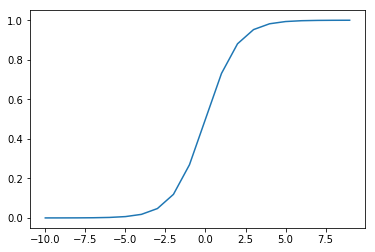

In [17]:
# plot sigmoid
import numpy as np
import matplotlib.pyplot as plt
import math
import random

x = np.arange(-10,10)
y = 1/(1+np.exp(-x))

plt.plot(x, y)
plt.show()

시그모이드 함수는 $z$가 무한대로 갈 때 1에 수렴하고, 음의 무한대로 갈 때 0에 수렴한다.

그래서 $h(x)$의 값은 0과 1 사이에 존재하게 된다.

지금은 시그모이드 함수를 있는 그대로 받아들이지만 나중에는 다른 함수도 살펴볼 것이다.

우선 시그모이드 함수의 미분을 살펴보자.

<br>
$$ g^`(z) = \frac{d}{dz}\frac{1}{1+e^{-z}}$$

$$ = \frac{1}{(1+e^{-z})^2}(e^{-z})$$

$$ = g(z)(1-g(z)$$
<br>

로지스틱 회귀 모델이 주어졌을 때, 어떻게 $\theta$를 조율할까?

앞서 최소자승법이 여러 가정하에서 최대우도법으로부터 도출되었던 것처럼, 이번에도 여러 확률 가정을 살펴보자.

<br>

$$P(y = 1| x; \theta) = h_\theta(x)$$
$$ P(y=0|x; \theta) = 1 - h_\theta(x) $$

위 성질을 가정하고, $m$개의 트레이닝 예제들이 상호 독립이라고 하자.

이때, 파라미터의 우도 함수를 다음과 같이 쓸 수 있다.

<br>
$ L(\theta) $

$= p(\vec{y}|X; \theta) $

$= \prod_{i=1}^mp(y^{(i)}|x^{(i)};\theta)$

$= \prod_{i=1}^m (h_\theta(x^{(i)}))^{y^{(i)}}(1-h_\theta(x^{(i)}))^{1-y^{(i)}}$
<br>

마찬가지로 로그를 취해서 식을 간단히 해준다.

그럼 어떻게 최대 우도값을 구할까? 선형 회귀에서처럼, **경사 상승법(Gradient Ascent)**을 사용하면 된다.

<br>
$ \frac{\partial}{\partial\theta_j}l(\theta) $

$ = (y \frac{1}{g(\theta^Tx)}-(1-y)\frac{1}{1-g(\theta^Tx)})\frac{\partial}{\partial\theta_j}g(\theta^Tx) $

$ = (y-h_\theta(x))x_j $


결국 아래와 같은 확률 경사 상승법 공식을 얻는다.


<br>
$$\theta_j := \theta_j + \alpha(y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)} $$
<br>

이 식을 LMS 업데이트 식에 비교하면, 식 자체는 동일한 것을 알 수 있다.

하지만 $h_\theta(x^{(i)})$가 이제는 비선형 함수이기 때문에, 같은 알고리즘은 아니다.

그럼에도 불구하고 서로 다른 알고리즘과 다른 학습 문제에서 같은 공식이 도출되었다는 점은 놀랍다.

단순한 우연일까, 아니면 무언가 더 심오한 이유가 있는 것일까? 나중에 GLM 모델에서 이에 답하겠다.

<br>
### 5-1. Digression : The perceptron learning algorithm

잠깐 여담으로 역사적으로 관심을 받았던 알고리즘에 대해 이야기해보자.

앞서 배운 로지스틱 회귀 모델이 정확히 0 또는 1의 값만 산출하도록 강제한다고 해보자. 

그렇게하기 위해, 다음과 같은 함수를 생각할 수 있다.

<br>
$$
g(z) = 
\begin{cases}
1 & if & z\geq 0 \\
0 & if & z \lt 0 
\end{cases}$$ <br>

여기서 $h_\theta(x) = g(\theta^Tx)$로 두면, 다음과 같은 업데이트 공식을 얻는다.

<br>
$$ \theta_j := \theta_j + \alpha(y^{(i)}-h_\theta(x^{(i)}))x_j^{(i)}$$
<br>

그리고 이를 **퍼셉트론 학습 알고리즘(Perceptron learning algorithm)**이라고 부른다.

1960년대에 '퍼셉트론'은 뇌에서 하나의 뉴런이 작동하는 대략적인 모델을 의미했다. 

비록 이 식이 우리가 배운 다른 알고리즘과 비슷하지만, 실은 아주 다른 종류의 알고리즘임을 기억해야 한다. 

특히 확률적인 해석이나 최대우도추정법등을 통해 퍼셉트론의 예측을 끌어내는 것은 매우 어렵다.

<br>
### 5-2. Digression : Newton's Method

뉴턴이 고안한 함수가 0이 되는 값을 찾는 방법이 있다.

하지만 이 방법은 여러 제약 조건 하에서만 응용 가능하고, 단순한 회귀 문제에서 사용할 수 있다.



![title](./newton.png)

위와 같은 함수 $f(x)$가 존재한다.

임의의 시작 지점 $X^{0}$에서 함수로 수직선을 그어 함수와 만나는 점 $f(X^{0})$를 찾는다.

그 점에서의 접선을 그어 또다시 $X$축과 만나는 점을 찾고, 그 점을 $X^{1}$이라고 한다.

위 방법을 반복한다.

이때, 접선의 기울기는 해당 접점에서의 미분값이고, $X_n - X_n+1 = \Delta$라고 하면,

$f^\prime(\theta^{0}) = \frac{f(\theta^0)}{\Delta} $ 가 된다. 식을 정리하면 다음 일반식을 얻는다.


<br>
$$ \theta^{(t+1)} = \theta^{(t)} - \frac{f(\theta^{(t)})}{f^\prime(\theta^{(t)})}$$
<br>

이제 이 사실을 이용하여 우리가 원하는 비용함수 $L(\theta)$의 미분값이 0이 되는 점을 찾자.

<br>
$$ \theta^{(t+1)} = \theta^{(t)} - \frac{l^\prime\theta^{(t)})}{f^{\prime\prime}(\theta^{(t)})}$$
<br>

위 과정을 반복하면 $L^\prime(\theta)$가 0이 되는 지점(최소 지점)을 찾을 수 있다.

$\theta$가 벡터인 경우, 일반식은 다음과 같다.

<br>
$$ \theta^{(t+1)} = \theta^{(t)} - H^{-1}\nabla_\theta L $$
$$ H : Hessian Matrix $$
$$ H_{ij} = \frac{\partial^2L}{\partial\theta_i\partial\theta_j} $$
<br>

보통 이 방법은 BGD보다 빠르게 수렴하고, 반복 횟수가 적지만, 연산량은 아주 클 수 있다.

왜냐하면 $n-n$ Hessian 행렬을 찾고 역행렬을 계산해야 하기 때문이다.

하지만 $n$ 이 그렇게 크지 않다면, 전반적인 속도는 훨씬 빠르다.

이 방법이 로지스틱 회귀의 로그 우도함수를 최대화 할 때 쓰일 경우, 그 모형은 **Fisher Scoring** 이라고도 불린다.


<br>
## Part 3. Generalized Linear Models (GLM)

이제까지, 우리는 회귀 예제와 분류 예제를 살펴보았다. 

이번 장에서는 사실 이 두 방법들이 더 큰 모델인 **일반 선형 모델(GLM)**의 한 가족이라는 것을 보일 것이다.

또한 GLM에 속한 다른 모델들도 살펴보겠다.

<br>
### 6. The exponential family

우선 지수분포족에 속하는 분포부터 살펴보자. 어떤 분포가 지수족에 속할 때, 다음의 형식으로 쓰일 수 있다.

<br>
$$ p(y;\eta) = b(y)exp(\eta^TT(y)-a(\eta))$$
<br>

여기서, $\eta$는 **자연 파라미터(natural, canonical parameter)**라고 부른다.

$T(y)$는 **충분통계량(sufficient statistic)**이 되고, $a(\eta)$는 **로그분할함수(log partition function)** 이다.

$T$, $a$, $b$의 선택이 $\eta$에 의해 만들어지는 분포군을 정의한다.  마찬가지로 $\eta$를 변화시키면 같은 분포군 내에서 서로 다른 분포를 얻는다.

한 예로 버눌리와 정규분포는 지수 분포족에 속한다는 것을 증명해보자.

###### Bernoulli
평균이 $\phi$인 버눌리 분포는,

<br>
$$ p(y=1; \phi); p(y=0; \phi) = 1 - \phi $$
<br>

$\phi$를 변화시키면 평균이 서로 다른 버눌리 분포를 얻게 된다.

또한,

<br>
$ p(y;\phi) $

$= \phi^y(1-\phi)^{1-y}$

$ = exp(ylog\phi + (1-y)log(1-\phi))$

$ = exp( ( log(\frac{\phi}{1-\phi}))y + log(1-\phi))$

여기서, 자연 파라미터는 $\eta = log(\phi/(1-\phi))$가 되고, 

여기서 $T(y) = y$, $a(\eta) = -log(1-\phi)$, $b(y) = 1$ 이 된다.

그리고 신기하게도 $\phi$에 대해 정리하면,

$$ \phi = \frac{1}{1+e^{-\eta}}$$

우리는 앞서 배웠던 시그모이드 함수를 얻게 된다!

###### Gaussian 

명심할 것은 $\sigma^2$의 값이 $\theta$와 $h_\theta(x)$의 선택에 영향을 미치지 않는다는 사실이다.

따라서 계산의 간편함을 위해 $\sigma^2$을 1로 두자.

<br>
$ p(y; \mu)$

$ = \frac{1}{\sqrt{2\pi}}exp(-\frac{1}{2}(y-\mu)^2)$

$ = \frac{1}{\sqrt{2\pi}}exp(-\frac{1}{2}y^2)exp(\mu y-\frac{1}{2}\mu^2) $
<br>

여기서 $n = \mu$, $T(y) = y$, $a(\eta) = \eta^2/2$, $b(y) = (1/\sqrt{2\pi})exp(-y^2/2)$가 된다.

<br>
이 둘을 제외하고도 지수 분포군에 속하는 것들은 많다.

다항분포, 포아송, 감마, 베타, 드리쉴레 등 많은 것들이 포함된다. 이제 다양한 모형들을 만드는 방법을 살펴보자.

<br>
### 7. Constructing GLMs

당신이 가게에 도착하는 고객들의 수를 추정하는 모형을 만든다고 하자. 사용하는 특징으로는 가게의 홍보 상태, 날씨, 요일 등이 있다.

보통 포아송 분포가 방문객의 수에 적합한 모형이라고 알려져 있다. 그리고 다행히도, 포아송은 지수 분포군에 속하기 때문에, GLM을 적용할 수 있다.

더 일반적으로, $x$의 함수로서 $y$를 예측하는 분류나 회귀 문제를 생각해보자. 이 문제에 대한 GLM을 구상해보면, $x$가 주어졌을 때 $y$의 분포에 대해 다음과 같은 3가지 가정을 내릴 수 있다.

1. $y|x;\theta ~ ExponentialFamily(\nu)$. $x$와 $\theta$가 주어졌을 때 $y$의 분포는 파라미터 $\nu$를 갖고 지수 분포군에 속한다.

2. $x$가 주어졌을 때, 우리의 목표는 $x$가 주어졌을 때 $T(y)$이 기대값을 예측하는 것이다.
대부분의 경우에 $T(y) = y$이고, $h(x) = E[y|x]$를 만족하길 바란다.

3. 자연 파라미터 $\nu$와 입력 변수 $x$는 선형 관계에 있다 : $\nu = \theta^Tx$

이 세가지 가정들은 우리가 학습 알고리즘을 쉽게 도출하고, 학습을 용이하게 해주는 많은 속성들을 갖는다.

#### 7-1. Ordinary Least Squares

타겟 변수 $y$가 연속형인 경우, $x$가 주어졌을 때 $y$의 분포를 정규분포로 가정하자.

이때, $h_\theta(x) = \nu = \theta^Tx $가 된다.


#### 7-2. Logistic Regression

이번에는 이진 분류 문제이다. $y$의 값이 이진형이기 때문에, 버눌리 분포를 사용하는 것이 자연스러워 보인다. 

즉, $h_\theta(x) = \phi = \frac{1}{1+e^{-\theta^Tx}} $가 된다.

가우시안 분포군의 canonical response function은 항등 함수이고, 버눌리의 그것은 로지스틱 함수이다.


#### 7-3. Softmax Regression

이번에는 타겟 변수 $y$가 $k$개의 값을 가지는 분류 문제를 생각해보자.

예를 들어, 이메일을 스팸과 아닌 것으로 분류하지 않고 3가지로 분류하고 싶다. 우리는 다항분포를  사용해 모형을 만든다.

우선 다항분포를 지수분포군으로 표현해보자.

$k$개의 가능한 결과에 대해 다항분포를 만들려면, 각 결과가 나올 확률을 $\phi_1, ... \phi_k$로 나타낼 수 있다.

하지만 이 파라미터들은 독립이 아니기 때문에, $k-1$개의 인자만을 사용할 것이다. 

이때 $\phi_i = p(y=i; \phi)$, $p(y=k; \phi) = 1-\sum_{i=1}^{k-1}\phi_i $ 이다.

또한 $T(y)$는 차원이 $(k-1)$인 벡터이다.

$T(1) = \Bigg[\begin{array}{c} 
1\\
0\\
...\\
0
\end{array}\Bigg] \hspace{1cm} T(2) = \Bigg[\begin{array}{c} 
0\\
1\\
...\\
0
\end{array}\Bigg] \hspace{1cm} ... \hspace{1cm} T(k-1) = \Bigg[\begin{array}{c} 
0\\
0\\
...\\
1
\end{array}\Bigg] \hspace{1cm} $ 

여기서 지시함수를 사용해 표현하면, $T(y)$의 $y$번째 항이 $i$인 경우에만 1인 벡터이다.

<br>
$$T(y)_i = 1\{y=i\}$$
<br>

식을 정리하면, 

<br>
$P(y) $

$= \phi_1^{I\{y=1\}}...\phi_k^{I\{y=k\}} $

$= \phi_1^{T(y)_1}...\phi_{k-1}^{T(y)_{k-1}} \phi_k^{1-\sum_{j=1}^{k-1}T(y)_j}$

$ = b(y) exp(\nu^TT(y) - a(\nu)) $

<br>
$where,$
<br>

$ \nu = \Bigg[ \begin{array}{c}
log(\phi_1/\phi_k)\\
...\\
log(\phi_{k-1}/\phi_k)
\end{array}\Bigg] \hspace{1cm} a(\nu) = -log(\phi_k) \hspace{1cm} b(y) = 1$
<br>
<br>

이제 $\phi$를 $\nu$에 대해 정리하면,

<br>
$$ \phi_i = \frac{e^{\nu_i}}{1+\sum_{j=1}^{k-1}e^{\nu_j}},\hspace{1cm} (i=1, ..., k-1)$$

$$ = \frac{e^{\theta_i^TX}}{1+\sum_{j=1}^{k-1}e^{\theta_j^TX}}$$
<br>

결국 학습 알고리즘 $h_\theta(x)$는 다음이 된다.

<br>
$ h_\theta(x) = E[T(y)|x; \theta] $

$ = E \Bigg[ \begin{array}{c}
I\{y=1\}\\
...\\
I\{y=k-1\} 
\end{array} \Bigg|  x; \theta\Bigg] = \Bigg[ \begin{array}{c}
\phi_1\\
...\\
\phi_{k-1} 
\end{array} \Bigg]$

$ = \Bigg[ \begin{array}{c}
\frac{e^{\theta_1^TX}}{1+\sum_{j=1}^{k-1}e^{\theta_j^TX}}\\
...\\
\frac{e^{\theta_{k-1}^TX}}{1+\sum_{j=1}^{k-1}e^{\theta_j^TX}} 
\end{array} \Bigg|  x; \theta\Bigg] $

<br>


본론으로 돌아가서, $ y \in \{1, ..., k\} $ 인 분류 문제를 해결하는 상황을 가정해보자.

여기서 해야할 일은 우도함수를 그린 뒤, 그 최대값을 구하는 일이다.

<br>
$ L(\theta) $

$ = \prod_{i=1}^m p(y^{(i)} | x^{(i)}; \theta) $

$ = \prod_{i=1}^m \phi_1^{I\{y^{(i)}=1\}}...\phi_k^{I\{y^{(i)}=k\}} $

$ where, \phi_i = \frac{e^{\theta_i^TX}}{1+\sum_{j=1}^{k-1}e^{\theta_j^TX}}$
<br>

이제 앞에서 한 것과 마찬가지로 로그를 취한 후 $\theta$에 대해 미분하여 *경사상승법 혹은 뉴턴의 방법을* 통해 $\theta$가 최대값이 되는 지점을 구하면 된다.

